In [78]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


# data structure
columns = ['compound',
    'atomic_ra', 'atomic_rb', 'atomic_rc',  # Atomic radius
    'covl_ra', 'covl_rb', 'covl_rc',  # Covalant radius
    'van_ra', 'van_rb', 'van_rc',  # Van der Wall radius
    'ionic_ra', 'ionic_rb', 'ionic_rc',  # Ionic radius
    'atomic_mass_a', 'atomic_mass_b', 'atomic_mass_c',  # Atomic mass
    'eNeg_a', 'eNeg_b', 'eNeg_c',  # Electronegativity
    'eAffin_a', 'eAffin_b', 'eAffin_c',  # Electron affinity
    'firstIoniz_a', 'firstIoniz_b', 'firstIoniz_c',  # First ionization potential
    'oxidation_a', 'oxidation_b', 'oxidation_c',  # Oxydation state
    'a', 'b', 'c', 'alpha', 'beta', 'gamma',  # Lattice parameters
    'BandGap',  # Band gap (some are metal too!)
    'formationE',  # Formation enerrgy per atom
]

lat_df = pd.read_csv('dataFile_new.csv', header=0,
                     index_col=0, usecols=columns)
print("The first five smaples from the DataFrame\n")
print(lat_df.head())


The first five smaples from the DataFrame

           atomic_ra  atomic_rb  atomic_rc  covl_ra  covl_rb  covl_rc  van_ra  \
compound                                                                        
Sr2YTaO6         2.0       1.80       1.45     1.92     1.62     1.38    2.55   
Sr2YReO6         2.0       1.80       1.35     1.92     1.62     1.59    2.55   
Sr2YIrO6         2.0       1.80       1.35     1.92     1.62     1.37    2.55   
Sr2CdWO6         2.0       1.55       1.35     1.92     1.48     1.46    2.55   
Sr2ScNbO6        2.0       1.60       1.45     1.92     1.44     1.37    2.55   

           van_rb  van_rc  ionic_ra  ...  oxidation_b  oxidation_c      a  \
compound                             ...                                    
Sr2YTaO6      2.4    2.20      1.12  ...            3            5  5.927   
Sr2YReO6      2.4    2.05      1.12  ...            3            5  5.909   
Sr2YIrO6      2.4    0.00      1.12  ...            3            5  5.880   
Sr2C

In [79]:
features = np.array(lat_df.loc[:, 'atomic_ra':'oxidation_c'], np.float32)
targets = np.array(lat_df.loc[:, 'a':'c'], np.float32)
# features = np.array(lat_df[['ra', 'rb', 'tolerance', 'rat']], np.float32)
# targets = np.array(lat_df[['a', 'b', 'c']], np.float32)

print ("\nThe first five observations of the features")
print (features[:5,:])
print ("\nThe first five observations of the targets")
print (targets[:5,:])


The first five observations of the features
[[2.0000000e+00 1.8000000e+00 1.4500000e+00 1.9200000e+00 1.6200000e+00
  1.3800000e+00 2.5500000e+00 2.4000001e+00 2.2000000e+00 1.1200000e+00
  8.9999998e-01 6.3999999e-01 8.7620003e+01 8.8905853e+01 1.8094788e+02
  9.4999999e-01 1.2200000e+00 1.5000000e+00 5.0200000e+00 3.0000000e+01
  3.1000000e+01 5.4950000e+02 6.0000000e+02 7.6100000e+02 2.0000000e+00
  3.0000000e+00 5.0000000e+00]
 [2.0000000e+00 1.8000000e+00 1.3500000e+00 1.9200000e+00 1.6200000e+00
  1.5900000e+00 2.5500000e+00 2.4000001e+00 2.0500000e+00 1.1200000e+00
  8.9999998e-01 5.7999998e-01 8.7620003e+01 8.8905853e+01 1.8620700e+02
  9.4999999e-01 1.2200000e+00 1.9000000e+00 5.0200000e+00 3.0000000e+01
  0.0000000e+00 5.4950000e+02 6.0000000e+02 7.6000000e+02 2.0000000e+00
  3.0000000e+00 5.0000000e+00]
 [2.0000000e+00 1.8000000e+00 1.3500000e+00 1.9200000e+00 1.6200000e+00
  1.3700000e+00 2.5500000e+00 2.4000001e+00 0.0000000e+00 1.1200000e+00
  8.9999998e-01 5.6999999e-01

[3.8382712e-01 2.5676575e-01 1.2001347e-01 9.0710968e-02 7.6118931e-02
 4.7591321e-02 2.3961993e-02 8.7358640e-04 5.6472862e-05 3.8354909e-05
 1.8975437e-05 1.1409301e-05 8.7026001e-06 1.3926040e-06 4.4722245e-07
 3.9987944e-07 3.0377439e-07 1.9161850e-07 1.0284596e-07 5.4387836e-08
 4.0295816e-08 2.5732811e-09 8.3240532e-16 8.3240532e-16 8.3240532e-16
 8.3240532e-16 2.1808114e-17]


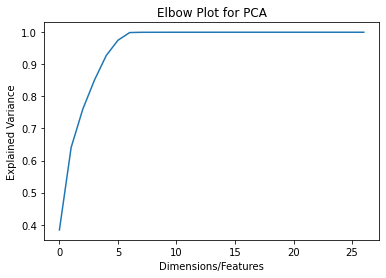

In [80]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(features.shape[1])
pca.fit(features)

print (pca.explained_variance_ratio_)

cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumulative_sum)
plt.title("Elbow Plot for PCA")
plt.ylabel("Explained Variance")
plt.xlabel("Dimensions/Features")
plt.show()

In [81]:
num_features = 5
pca = PCA(n_components= num_features)
reduced_features = pca.fit_transform(features)

print (np.cumsum(pca.explained_variance_ratio_)[-1])

0.92743623


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

# The seed is required for replication of results. Parameters defined.
seed = 1111

X = pd.DataFrame(reduced_features, columns = columns[1:num_features+1])
y = pd.DataFrame(targets[:, 0], columns = ['a'])

k = 4
kf = KFold(n_splits=k)
scoreMAE = []
y_pred = []

gbReg = GradientBoostingRegressor(n_estimators=800, max_depth=9, random_state= seed, loss='lad')

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    gbReg.fit(X_train, y_train)
    y_pred.extend(gbReg.predict(X_train))

    scoreMAE.append(gbReg.score(X_test, y_test))
    
print (sum(scoreMAE)/k)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbReg.fit(X_train, y_train)
print (gbReg.score(X_test, y_test))

-0.23595347631824345
0.15818421281581307


In [83]:
y_prediction = gbReg.predict(X_test)
print (y_prediction)

[6.86413336 5.8802512  5.79801386 5.77802    6.46400023 5.64817969
 6.49930536 5.94859851 5.42607311 5.68182112 5.78186735 6.67529782
 5.79240547 6.19235847 5.66096977 5.73737093 5.72331194 6.05316212
 6.59876474 6.13084267]


In [84]:
from sklearn.metrics import mean_absolute_error

print (mean_absolute_error(y_test, y_prediction))

0.5772875423635879
